**load spotify dataset**

In [2]:
import pandas as pd
df = pd.read_csv('/data.csv')
df.head()
df = df.sample(n=5000,random_state=42).reset_index(drop=True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978


**Features and scaling**

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]))
df_scaled

,0,1,2,3,4,5,6,7
0,-0.005840,2.032267,0.142150,1.916073,-0.783298,-0.107375,0.310507,1.473178
1,1.126217,0.276101,-0.771789,-0.171477,-0.446557,-0.133457,-0.886487,0.226049
2,-0.908852,1.941333,0.138480,-0.536877,-0.194001,1.737477,-0.865614,0.470135
3,1.144646,-0.417272,-0.716732,2.122604,-0.536354,-0.387900,2.266056,-1.249911
4,1.297342,0.634154,-1.404939,2.151200,-0.536354,0.010283,-1.477663,-0.387981
...,...,...,...,...,...,...,...,...
4995,-0.837769,-0.019435,0.810170,-0.536877,-0.598090,-0.353124,0.374302,0.336651
4996,-1.106567,1.009258,1.357065,-0.536877,0.434583,-0.270821,-0.824128,1.507503
4997,0.999848,-1.826752,-0.599278,-0.536835,0.114678,-0.387900,-2.003804,-0.681647
4998,1.284178,-0.815109,-1.495966,-0.287769,-0.592478,-0.412243,-0.516212,-0.906665


**Train Test Split**

In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_scaled, test_size=0.2, random_state=42)

**Elbow method plot**

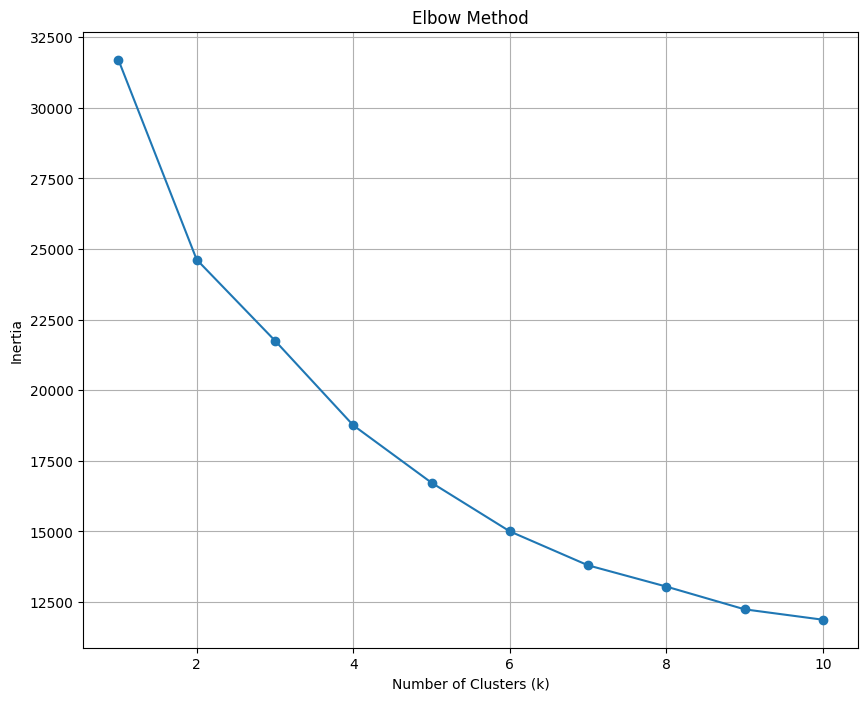

In [6]:
# to find optimal k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

**Applying kmeans**

In [7]:
optimal_k = 5
kmeans = KMeans(n_clusters = optimal_k, random_state= 42)
df['cluster']= kmeans.fit_predict(df_scaled)

In [8]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.910,1977,0.5000,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772000,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805,1
1,0.583,1976,0.9300,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115000,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,0
2,0.647,1994,0.1570,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744,1
3,0.196,1957,0.9370,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837000,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764,2
4,0.422,1921,0.9950,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846000,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.612,2001,0.1840,['Alice Cooper'],0.533,186093,0.7030,0,5LY8GsHfU7G6tmeXxStEb6,0.000000,2,0.101,-6.364,1,No More Mr. Nice Guy - 2002 Remaster,42,2001,0.0423,128.761,1
4996,0.919,1999,0.0819,['Britney Spears'],0.714,200467,0.8520,0,6039GmVngyHmWfOuWOhjCK,0.000000,8,0.285,-6.570,1,Soda Pop,40,1999-01-12,0.0565,92.016,1
4997,0.345,2012,0.8820,['Issa Ibrahim'],0.215,167741,0.3190,0,4UuMkQLjxSgcrW2d1zFIJT,0.000013,0,0.228,-12.845,1,Susan,0,2012-09-03,0.0363,55.846,2
4998,0.286,1942,0.9900,"['Felix Mendelssohn', 'Paul Robeson Jr.', 'Law...",0.393,187267,0.0747,0,2rRxJzTQyvm5Wwj9ObnZvv,0.078400,10,0.102,-17.930,1,"The Lord God of Abraham, from Elijah, Op. 70",0,1942,0.0321,101.457,2


In [9]:
df['cluster'].value_counts()

,count
cluster,
1,1371
0,1369
4,1104
2,948
3,208


Text(0.5, 1.0, 'kmean clusters')

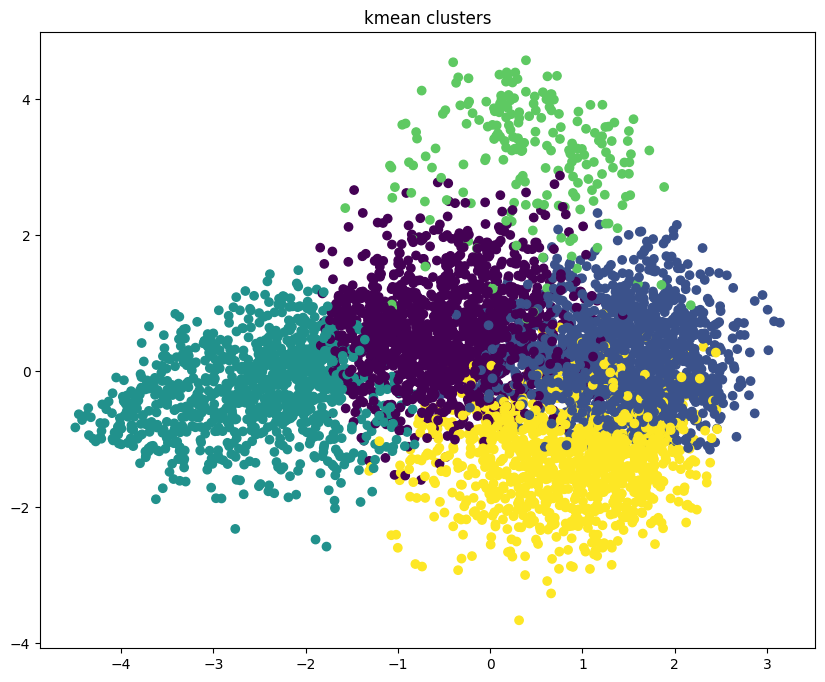

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

pca_result

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0],pca_result[:,1], c=df['cluster'], cmap='viridis')
plt.title('kmean clusters')

**Recommendation system with kmeans**

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(song_name, df, num_recommendations = 5):
  # get cluster for input song
  song_cluster = df[df['name']== song_name]['cluster'].values[0]
  # filter all songs present in this cluster
  same_cluster_songs = df[df['cluster'] == song_cluster]

  # calulate similatrity within the same cluster
  song_index = same_cluster_songs[same_cluster_songs['name']==song_name].index[0]
  cluster_features = same_cluster_songs[numerical_features]
  similarity= cosine_similarity(cluster_features,cluster_features)

  # get top recommendations
  similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
  recommendations= same_cluster_songs.iloc[similar_songs][['name','year','artists']]

  return recommendations


In [18]:
# example
input_song = 'Camby Bolongo'
recommended_songs = recommend_songs(input_song, df, num_recommendations = 5)
print(f"Recommended songs for '{input_song}':")
print(recommended_songs)

Recommended songs for 'Camby Bolongo':
                                          name  year                 artists
3444                         Bitch to the Boys  1982            ['Shakatak']
3027  Chella llà - Instrument and base Version  1942  ['Orchestra Studio 7']
4899                            Danse Fambeaux  1968            ['Dr. John']
3124      Aragon - From The "Coffy" Soundtrack  1973           ['Roy Ayers']
647                                 Into Black  2011              ['Blouse']


In [19]:
 # example
input_song = 'Soul Junction'
recommended_songs = recommend_songs(input_song, df, num_recommendations = 5)
print(f"Recommended songs for '{input_song}':")
print(recommended_songs)

Recommended songs for 'Soul Junction':
                                                   name  year  \
1088                                Legends of the Fall  1995   
3489  Water Music Suite No. 1 In F, HWV 348: 2. Adag...  1983   
2473  Le sacre du printemps: Part 1 "Adoration of th...  1948   
1277                                    Saving Buckbeak  2004   
3385                Tristan und Isolde, WWV 90: Prelude  1953   

                                                artists  
1088                    ['James Horner', 'Vic Frasier']  
3489  ['George Frideric Handel', 'The English Concer...  
2473  ['Igor Stravinsky', 'Columbia Symphony Orchest...  
1277                                  ['John Williams']  
3385             ['Richard Wagner', 'Arturo Toscanini']  


In [21]:
df.to_csv('clustered_df.csv')

In [22]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.910,1977,0.5000,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772000,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805,1
1,0.583,1976,0.9300,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115000,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,0
2,0.647,1994,0.1570,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744,1
3,0.196,1957,0.9370,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837000,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764,2
4,0.422,1921,0.9950,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846000,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.612,2001,0.1840,['Alice Cooper'],0.533,186093,0.7030,0,5LY8GsHfU7G6tmeXxStEb6,0.000000,2,0.101,-6.364,1,No More Mr. Nice Guy - 2002 Remaster,42,2001,0.0423,128.761,1
4996,0.919,1999,0.0819,['Britney Spears'],0.714,200467,0.8520,0,6039GmVngyHmWfOuWOhjCK,0.000000,8,0.285,-6.570,1,Soda Pop,40,1999-01-12,0.0565,92.016,1
4997,0.345,2012,0.8820,['Issa Ibrahim'],0.215,167741,0.3190,0,4UuMkQLjxSgcrW2d1zFIJT,0.000013,0,0.228,-12.845,1,Susan,0,2012-09-03,0.0363,55.846,2
4998,0.286,1942,0.9900,"['Felix Mendelssohn', 'Paul Robeson Jr.', 'Law...",0.393,187267,0.0747,0,2rRxJzTQyvm5Wwj9ObnZvv,0.078400,10,0.102,-17.930,1,"The Lord God of Abraham, from Elijah, Op. 70",0,1942,0.0321,101.457,2
